In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
data = pd.read_csv("C:/Users/HPPC/Desktop/python projects/IBM_COURSE-WORK/car_evaluation.csv")
data[0:5]

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names
data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
data['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
#Trying to find out if ive got null values
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
#removing the target variable from the feature set
X = data . drop(['class'], axis = 1)
X[0:5]

#declaring the target variable 
Y = data["class"]
Y


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.33, random_state= 42)
X_train.shape
X_test.shape

(570, 6)

In [17]:
#pEERFORMING FEATURE ENGINEERING ON DIFFERENT VARIABBLES
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [19]:
X_train.head()
#They are oridinal categorical data types

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [25]:
#Encoding the variables with ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
Ordinal_Encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = Ordinal_Encoder.fit_transform(X_train)
X_test = Ordinal_Encoder.fit_transform(X_test)
X_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1
1563,4,3,2,2,3,2
1395,4,1,1,2,2,2
1506,4,2,1,2,1,2
500,2,1,3,3,3,1
179,1,2,3,2,2,1


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0 )
clf_gini.fit(X_train,Y_train)
#max_depth = limits the maximum depth of the tree helping to control overfitting
#random_state_0 = ensures that the result are reproducible buy setting the seed for thr random number generator

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
#predicting the test results with the gini index 
Y_pred_gini = clf_gini.predict(X_test)

In [31]:
#Checking the accuracy sore with the criterion gini index
#This means that were using the accuracy score to predict the models performance by comparing the predicted values(Y_pred_gini) with the actual values
from sklearn.metrics import accuracy_score
print("Model accuaracy score with criterion gini index: {0:0.4F}".format(accuracy_score(Y_test,Y_pred_gini)))

Model accuaracy score with criterion gini index: 0.7263


COMPARING THE TRAINING SET AND THE TEST SET ACCURACY SCORE TO SEE IF THERE ARE ANY SIGNS OF OVERFITTING

In [41]:
from sklearn.metrics import accuracy_score
Y_train_Pred_gini = clf_gini.predict(X_train)
Y_train_Pred_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_train_Pred_gini)))

Training-set accuracy score: 0.7848


In [43]:
#comparing the values
print("Training set score: {0:0.4}".format(clf_gini.score(X_train,Y_train)))
print("Testing score accuracy: {0:0.4}".format(clf_gini.score(X_test,Y_test)))

Training set score: 0.7848
Testing score accuracy: 0.7263


VISUALIZING THE DECISION TREEE


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

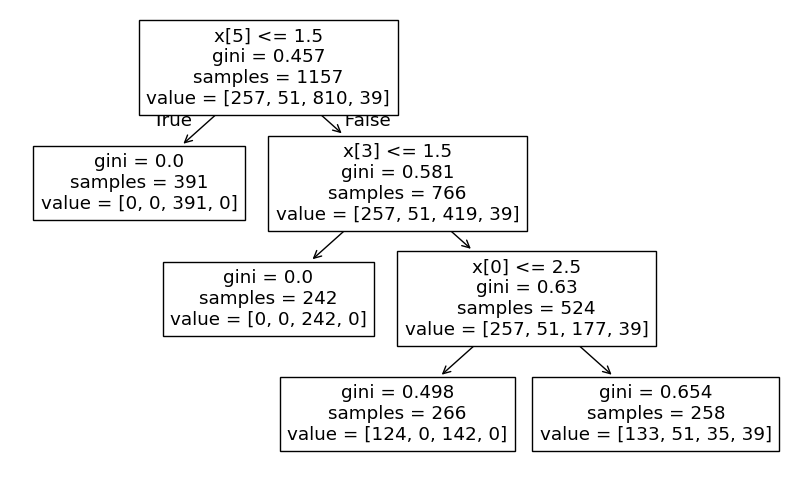

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(clf_gini.fit(X_train,Y_train))


Splitting condtion = the condition the split was made x[5] < = 1.5 means that the split was made at feature 5 with a threshhld of 1.5

Gini index = Impurity of the node, 0 meaning that the node is pure and all samples belong to a single class

samples = number of data points in the node

Values = distribution of classes in the node according to samples


CONFUSION MATRIX


It gives the correct and incorrect predictions of the model by category

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_gini)
print('confusion_matrix\n\n', cm)

confusion_matrix

 [[ 58   0  69   0]
 [ 11   0   7   0]
 [ 43   0 356   0]
 [ 17   0   9   0]]
